# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [25]:
# student 1: Omri 4916
# student 2: Ori 5202
# student 3: Ran 5099

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [26]:
# ייבוא ספריות רלוונטיות

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB


In [27]:
# טעינת דאטהסט מקובץ אקסל לתוך דאטהפריים 
def load_dataset(file_name):
    df = pd.read_csv(file_name)
    return df
# טעינה של טריין סט והצגת 5 שורות ראשונות

trainset=load_dataset("titanic_train.csv")
print(trainset.shape)
trainset.head()

(712, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [28]:

# טעינה של טסט סט והצגת 5 שורות ראשונות

testset=load_dataset("titanic_test.csv")
print(testset.shape)
testset.head()

(179, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [29]:
# הצגה טבלאית ראשונה
# תקציר ססטיסטי על הנתונים
# למשל:כמות, ממוצע, מינימום, מקסימום, סטיית תקן, אחוזונים

trainset.describe()
# הצגה טבלאית שניה
# הצגת העמודות, טיפוס הנתונים, וערכים חסרים 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [30]:
trainset.info()
# הצגה טבלאית שלישית
# חישוב מטריצת המקדמים -מדידת קשר ליניארי בין שני משתנים
# הערכים נעים בין 1 ל1- כך ש: 1 הינו קשר חיובי מושלם, 1- הינו שלילי מושלם ו-0 הינו חוסר קשר

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [31]:
corr_matrix = trainset.corr()
corr_matrix

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


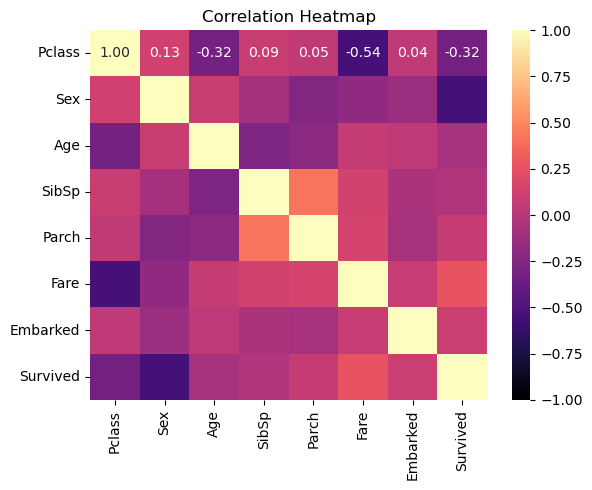

In [32]:
# הצגה ויזואלית ראשונה 
#יוצרים מפת חום למטריצת המתאם
#אפשר לראות שעבור הצבע צהוב בהיר - יש קשר מושלם כי זה משתנה מול עצמו
# אדום כתום מצביעים על קשר חיובי
# כחולים כהה ושחור מצביע על קשר שלילי
# סגול וורוד מצביע על חוסר קשר

plt.figure()
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Continuous Variables - before scaling...')

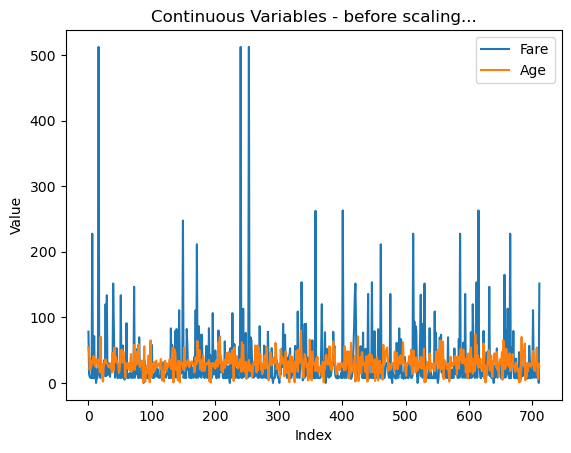

In [33]:
# הצגה ויזואלית שניה 
# הנתונים בעלי ערך רציף ובטווחים קיצוניים בין עמודות
# הגרף הינו קשה לקריאה וניתוח הנתונים בצורה זו עלול לפגוע בתוצאות הניסויים
# בהמשך נראה את הגרף שוב, לאחר ביצוע סקאלינג

continuous_columns = ['Fare','Age']
trainset[continuous_columns].plot()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Continuous Variables - before scaling...')

c:\Users\omrib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


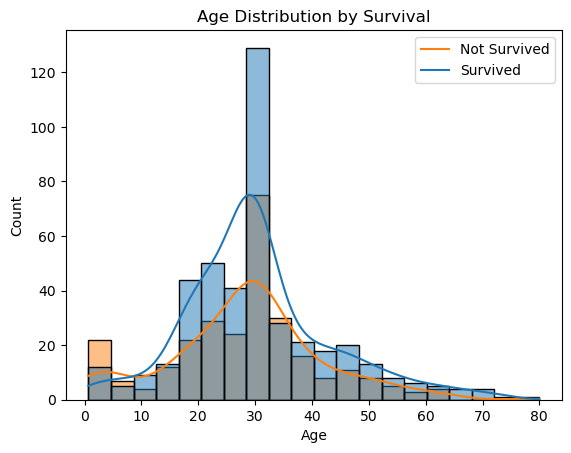

In [34]:
# הצגה ויזואלית שלישית 
# יצירת גרף התפלגות גיל הנוסעים לפי הישרדותם
# רוב הנוסעים שלא שרדו היו בקבוצת הגילאים 20-30 והנוסעים ששרדו היו בעיקר בני 20-40

sns.histplot(data=trainset, x='Age', hue='Survived', kde=True, bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [35]:
#feature engineering
# בדיקת ערכים חסרים
# אין ערכים חסרים בטריין סט ובטסט סט ואין צורך בטיפול בהם
missing_train = trainset.isnull().sum()
missing_test = trainset.isnull().sum()

print(missing_train) 
print('\n')
print(missing_test)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [36]:

# הוספת עמודה של מספר בני המשפחה בטריין סט

trainset['FamilySize'] = trainset['SibSp'] + trainset['Parch'] + 1
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,1,0,54.0,1,0,78.2667,1,1,2
1,2,0,45.0,0,0,13.5000,0,1,1
2,3,1,20.0,0,0,9.5000,0,0,1
3,3,1,36.0,0,0,7.8958,0,0,1
4,3,1,22.0,0,0,8.0500,0,0,1


In [37]:
# הוספת עמודה של מספר בני המשפחה בטסט סט

testset['FamilySize'] = testset['SibSp'] + testset['Parch'] + 1
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,3,1,35.000000,0,0,7.0500,0,0,1
1,3,1,30.000000,0,0,7.2500,0,0,1
2,3,1,29.699118,0,0,14.5000,0,0,1
3,3,0,21.000000,0,0,7.7500,2,0,1
4,3,1,32.000000,0,0,56.4958,0,1,1


In [38]:
# יצירת עמודה קטגוריאלית לפי עמודת גיל בטריין סט

bins = [0, 12, 18, 30, 50, 200]  ## הגדרת גבולות עבור קטגוריות הגיל
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']# הגדרת תוויות עבור כל קטגוריית גיל 
trainset['AgeCategory'] = pd.cut(trainset['Age'], bins=bins, labels=labels) #יצירת העמודה
#מיפוי בין התווית של הקטגוריה לקידוד המספרי
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
trainset['AgeCategory'] = trainset['AgeCategory'].map(category_mapping) #הגדרת המיפוי בתוך העמודה
trainset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,1,0,54.0,1,0,78.2667,1,1,2,5
1,2,0,45.0,0,0,13.5000,0,1,1,4
2,3,1,20.0,0,0,9.5000,0,0,1,3
3,3,1,36.0,0,0,7.8958,0,0,1,4
4,3,1,22.0,0,0,8.0500,0,0,1,3


In [39]:
# יצירת עמודה קטגוריאלית לפי עמודת גיל בטסט סט

bins = [0, 12, 18, 30, 50, 200]  ## הגדרת גבולות עבור קטגוריות הגיל
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']# הגדרת תוויות עבור כל קטגוריית גיל 
testset['AgeCategory'] = pd.cut(testset['Age'], bins=bins, labels=labels) #יצירת העמודה
#מיפוי בין התווית של הקטגוריה לקידוד המספרי
category_mapping = {'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
testset['AgeCategory'] = testset['AgeCategory'].map(category_mapping) #הגדרת המיפוי בתוך העמודה
testset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,AgeCategory
0,3,1,35.000000,0,0,7.0500,0,0,1,4
1,3,1,30.000000,0,0,7.2500,0,0,1,3
2,3,1,29.699118,0,0,14.5000,0,0,1,3
3,3,0,21.000000,0,0,7.7500,2,0,1,3
4,3,1,32.000000,0,0,56.4958,0,1,1,4


c:\Users\omrib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\omrib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


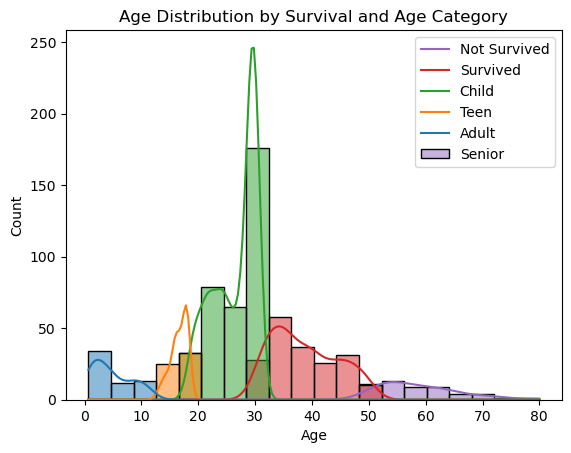

In [40]:
# ויזואליזציה עם עמודת הקטגוריה החדשה לגילאים
sns.histplot(data=trainset, x='Age', hue='AgeCategory', kde=True, bins=20)
plt.title('Age Distribution by Survival and Age Category')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived', 'Child', 'Teen', 'Adult', 'Senior'])
plt.show()

In [41]:
# סקאלינג

scaler = MinMaxScaler()  # הגדרת מודל הסקאלינג בו נשתמש
columns_to_scale = ['Age', 'Fare']   # העמודות להן נרצה לבצע סקאלינג
#הפעלת הסקאלינג על המודל בעמודות הנבחרות
trainset[columns_to_scale] = scaler.fit_transform(trainset[columns_to_scale]) 
(trainset['Age']).describe() # בדיקה בה רואים שערך המינימום 0 והמקסימום 1 

count    712.000000
mean       0.363812
std        0.166243
min        0.000000
25%        0.268877
50%        0.365929
75%        0.432749
max        1.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Continuous Variables - after scaling...')

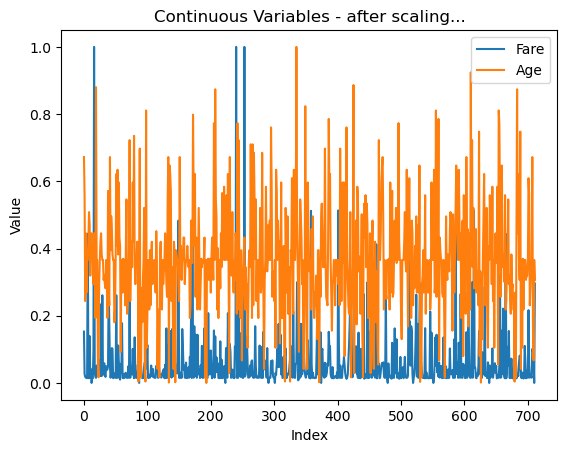

In [42]:
# ויזואליזציה לאחר סקאלינג
# ניתן לראות שכעת הערכים נעים בין 0 ל1

continuous_columns = ['Fare','Age']   #רשימת העמודות של המשתנים הרציפים
trainset[continuous_columns].plot()   #יצירת הגרף
plt.xlabel('Index')                   #כותרת ציר איקס
plt.ylabel('Value')                   #כותרת ציר ווי
plt.title('Continuous Variables - after scaling...')  #כותרת לגרף

In [43]:
# אימון וחיזוי לפי אלגוריתם KNN
# הקוד מבצע את שלבי הכנת הנתונים, חלוקת הנתונים, אימון המודל, חיזוי תוצאות הבדיקה וחישוב דיוק המודל

# בחירת עמודות התכונות ועמודת המטרה מתוך קבוצות האימון והבדיקה 
X_train = trainset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y_train = trainset['Survived']
X_test = testset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
y_test = testset['Survived']

knn_model = KNeighborsClassifier(n_neighbors=5)  # הגדרת המודל עם 5 שכנים קרובים
knn_model.fit(X_train, y_train)  # התאמת המודל על קבוצת האימון
y_pred = knn_model.predict(X_test)  # חיזוי התגובות על קבוצת הבדיקה
accuracy = accuracy_score(y_test, y_pred)  # מדידת הדיוק של המודל
print("Accuracy of KNN model:", accuracy)  # הדפסת תוצאת הדיוק

Accuracy of KNN model: 0.7094972067039106


In [44]:
# אימון וחיזוי לפי אלגוריתם Naive Bayes

nb_model = GaussianNB()  # הגדרת המודל 
nb_model.fit(X_train, y_train)  # התאמת המודל על קבוצת האימון
y_pred_nb = nb_model.predict(X_test)  # חיזוי התגובות על קבוצת הבדיקה
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # מדידת הדיוק של המודל
print("Accuracy of Naive Bayes model:", accuracy_nb)  # הדפסת תוצאת הדיוק

Accuracy of Naive Bayes model: 0.3407821229050279


In [45]:
# אימון וחיזוי לפי אלגוריתם עץ החלטה

dt_model = DecisionTreeClassifier() # הגדרת מודל עץ החלטה
dt_model.fit(X_train, y_train)  # התאמת המודל על קבוצת האימון
y_pred_dt = dt_model.predict(X_test)  # חיזוי התגובות על קבוצת הבדיקה
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # מדידת הדיוק של המודל
print("Accuracy of Decision Tree model:", accuracy_dt)   # הדפסת תוצאת הדיוק


Accuracy of Decision Tree model: 0.7821229050279329


In [46]:
#בחירת היפרפרמטרים אופטימליים עם 
#grid search & cross validation
param_grid_knn = {                    # הגדרת טווחי היפרפרמטרים למודל KNN  
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
param_grid_dt = {                        # הגדרת טווחי היפרפרמטרים למודל העץ החלטה 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# יצירת פונקציה לביצוע Grid Search וחישוב המדדים
def run_grid_search_and_evaluation(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return {
        'Model': model.__class__.__name__,
        'Best Parameters': grid_search.best_params_,
        'Best CV Accuracy': grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results = []   # יצירת רשימה לאחסון התוצאות


models = [    # יצירת מודלים
    ('KNN', KNeighborsClassifier(), param_grid_knn),
    ('Decision Tree', DecisionTreeClassifier(), param_grid_dt)
]

# ביצוע Grid Search וחישוב המדדים עבור כל מודל
for name, model, param_grid in models:
    result = run_grid_search_and_evaluation(X_train, y_train, X_test, y_test, model, param_grid)
    results.append(result)

results_df = pd.DataFrame(results)  # המרת הרשימה לדאטה פריים
results_df   # הדפסת הטבלה הסופית עם התוצאות

,Model,Best Parameters,Best CV Accuracy,Accuracy,Precision,Recall,F1 Score
0,KNeighborsClassifier,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.790771,0.782123,0.711538,0.606557,0.654867
1,DecisionTreeClassifier,"{'criterion': 'gini', 'max_depth': 40, 'min_sa...",0.797745,0.782123,0.666667,0.721311,0.692913


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [47]:
best_model = Pipeline([   # הגדרת המודל הטוב ביותר 
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), ['Age', 'Fare']),
            ('cat', SimpleImputer(strategy='most_frequent'), ['Sex']),
        ],
        remainder='passthrough'
    )),
    ('classifier', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

best_model.fit(X_train, y_train)  # אימון המודל
y_pred = best_model.predict(X_test) # חיזוי ומדידת ביצועי המודל על קבוצת הבדיקה
# חישוב מדדים על קבוצת הבדיקה
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#הדפסת המדדים והתוצאות
print("Evaluation Metrics for the Best Decision Tree Model:\n")
print(f"Accuracy on test set: {accuracy}")
print(f"Precision on test set: {precision}")
print(f"Recall on test set: {recall}")
print(f"F1 Score on test set: {f1}")

Evaluation Metrics for the Best Decision Tree Model:

Accuracy on test set: 0.7597765363128491
Precision on test set: 0.65
Recall on test set: 0.639344262295082
F1 Score on test set: 0.6446280991735538


## Part 5 - Apply on test and show model performance estimation

In [48]:
# יישום Feature Engineering האופטימליים על הטסט סט 
X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)
y_pred_test = best_model.predict(X_test) # חיזוי התוצאות על הטסט סט
accuracy_test = accuracy_score(y_test, y_pred_test)  # חישוב דיוק התוצאות על הטסט סט
# יצירת DataFrame עם החיזויים והערכים האמיתיים
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test
})

print("\nתוצאות חיזוי נוספות:")
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\n')
# הדפסת הטבלה עם החיזויים לעומת הערכים האמיתיים
print("תוצאות חיזוי ודיוק המודל על הטסט :\n")
print("Predictions vs. Actuals on Test Set:")
results_df.head(5)


תוצאות חיזוי נוספות:
Precision: 0.65
Recall: 0.639344262295082
F1 Score: 0.6446280991735538


תוצאות חיזוי ודיוק המודל על הטסט :

Predictions vs. Actuals on Test Set:


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
